In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import minmax_scale

In [3]:
vodka_data = pd.read_excel("FINALdatablindtest.xls")   # Excel data is read

vodka_data.head()

,Resp No,PANEL,CENTRE,MAIN_BRND,AGE,AGES,Plcmnt_Ordr,Prod,Q2A,Q2B,...,Q5A_att5,Q5A_att6,Q5A_att7,Q5A_att8,Q5B_att1,Q5B_att2,Q5B_att3,Q5B_att4,Q5B_att5,"Q6_Int_p (Y=1,N=2)"
0,1,2,1,2,34,2,1,2,7,3,...,7,7,7,7,3,4,4,4,3,2
1,1,2,1,2,34,2,2,3,8,5,...,8,7,8,8,5,5,5,5,3,2
2,1,2,1,2,34,2,3,1,4,5,...,7,7,6,7,5,5,3,5,5,2
3,2,3,1,2,26,1,1,3,7,4,...,7,8,10,8,3,3,3,3,3,1
4,2,3,1,2,26,1,2,1,9,2,...,9,10,10,9,3,3,4,4,3,1


In [4]:
vodka_data.groupby(vodka_data['Prod']).count()   # counting the rows corresponfing to each product

,Resp No,PANEL,CENTRE,MAIN_BRND,AGE,AGES,Plcmnt_Ordr,Q2A,Q2B,Q3A,...,Q5A_att5,Q5A_att6,Q5A_att7,Q5A_att8,Q5B_att1,Q5B_att2,Q5B_att3,Q5B_att4,Q5B_att5,"Q6_Int_p (Y=1,N=2)"
Prod,,,,,,,,,,,,,,,,,,,,,
1,760,760,760,760,760,760,760,760,760,760,...,760,760,760,760,760,760,760,760,760,760
2,760,760,760,760,760,760,760,760,760,760,...,760,760,760,760,760,760,760,760,760,760
3,760,760,760,760,760,760,760,760,760,760,...,760,760,760,760,760,760,760,760,760,760


In [5]:
cross_tab = (pd.crosstab(vodka_data['Q5A_att1'],vodka_data['Prod']))
cross_tab.apply(lambda x : x.sum())

Prod
1    760
2    760
3    760
dtype: int64

In [6]:
# For product T1 and C, compare if there is significant dofference between the groups with rating 9 or 10 
# For T1 : 23.81578 + 11.973684
# For C :18.421053 + 11.842105
# with 95% CI find the range and then compare both the groups 

cross_tab.iloc[9:,:-1]
percentage = cross_tab.iloc[9:,:-1].sum()/cross_tab.apply(lambda x : x.sum())

percentage
#percentage
import math
margin_of_error = 1.96 * math.sqrt((percentage[1]*(1-percentage[1]))/760)  # Calculating margin of error

margin_of_error
upper_limit = percentage[1]*100 + margin_of_error
lower_limit = percentage[1]*100 - margin_of_error



# Scikit Learn Regression -  No statistical summary

In [7]:
model = LinearRegression()
model.fit(X= vodka_data.iloc[:,13:20],y = vodka_data['Q5A_att1'])
pd.Series(data = model.coef_,index = vodka_data.iloc[:,13:20].columns).nlargest(12)

LinearRegression.score(model,vodka_data.iloc[:,13:20],vodka_data['Q5A_att1'])


0.77490963998350237

* A linear regression model is fit using scikit learn with all the 7 variables as predictors. R2 score was 0.77

In [8]:
vodka_data['Q5A_att1'].shape

(2280,)

# Statsmodels regression to see statistical summary

In [14]:
import statsmodels.api as sm # Note the difference in argument order 
adc=sm.add_constant(vodka_data.iloc[:,13:20]) # A constant term is added to determine the intercept value
model = sm.OLS(vodka_data['Q5A_att1'], adc).fit() 
predictions = model.predict(adc) # make the predictions by the model 
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Q5A_att1   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1117.
Date:                Wed, 13 Jun 2018   Prob (F-statistic):               0.00
Time:                        22:16:20   Log-Likelihood:                -2736.5
No. Observations:                2280   AIC:                             5489.
Df Residuals:                    2272   BIC:                             5535.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5755      0.082      7.042      0.000       0.415       0.736
Q5A_att2       0.1593      0.014     11.493      0.000       0.132       0.186
Q5A_att3       0.2821      0.019     14.529      0.000       0.244       0.320
Q5A_att4       0.1072      0.017      6.181      0.000       0.073       0.141
Q5A_att5       0.0783      0.018      4.454      0.000       0.044       0.113
Q5A_att6       0.0871      0.018      4.721      0.000       0.051       0.123
Q5A_att7       0.0347      0.020      1.730      0.084      -0.005       0.074
Q5A_att8       0.1890      0.021      9.070      0.000       0.148       0.230
==============================================================================
Omnibus:                      144.565   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              500.205
Skew:                          -0.238   Prob(JB):                    2.41e-109
Kurtosis:                       5.245   Cond. No.                         98.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Description of Results and Driver Analysis

* R2 is 0.775 and adjusted R2 is 0.774. Both are very close and it means that all of the predictors are important
* F - statistic's p-value is 0.00 which means that the overall regression is significant
* All of the predictors are significant except Q5A_att7. Thus After taste is not important in explaining the overall likeability
*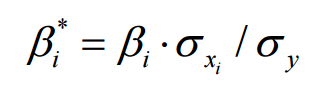
Here B* is the standardized coefficient and B is the coefficient obtained through regression. It is multiplied with the ratio of  'standard deviation of predictor/standard deviation of dependent vatiable'.

In [18]:
df=pd.DataFrame(model.params)
df=df.iloc[1:,:]

In [25]:
import numpy as np
std_pred=np.std(vodka_data.iloc[:,13:20])   # calculate standard deviation of predictors
res_pred=np.std(vodka_data['Q5A_att1'])     # Calculate standard deviation of response
std_pred=pd.DataFrame(std_pred)
df=pd.concat([df,std_pred],axis=1)

In [27]:
df.columns=['Unstandardized coefficients','standard deviation of predictors']
df

,Unstandardized coefficients,standard deviation of predictors
Q5A_att2,0.159295,1.840281
Q5A_att3,0.282143,1.766104
Q5A_att4,0.107188,1.817990
Q5A_att5,0.078326,1.806582
Q5A_att6,0.087125,1.828062
Q5A_att7,0.034692,1.755892
Q5A_att8,0.188969,1.742148


In [28]:
# Standard deviation of response
res_pred

1.6936786133461925

In [30]:
def standardize_coefficient(x):
    return x['Unstandardized coefficients']*x['standard deviation of predictors']/res_pred

df['Standardized coefficients']= df.apply(standardize_coefficient,axis=1)

In [31]:
df

,Unstandardized coefficients,standard deviation of predictors,Standardized coefficients
Q5A_att2,0.159295,1.840281,0.173083
Q5A_att3,0.282143,1.766104,0.294208
Q5A_att4,0.107188,1.817990,0.115055
Q5A_att5,0.078326,1.806582,0.083548
Q5A_att6,0.087125,1.828062,0.094038
Q5A_att7,0.034692,1.755892,0.035966
Q5A_att8,0.188969,1.742148,0.194377


* From the above table we find that,
        att3 (Taste), 
        att8(Mouth feel) and 
        att2(Aroma) 
  are the most important driving factors and marketing efforts should be directed towards highlighting them.

# Regression Equation


The attribute 7(After taste) is removed. Regression is ran again without this predictor


Overall Likeability of Aroma = 0.5755 + 0.159295 * Q5A_att2 + 0.282143 * Q5A_att3 + 0.107188 * Q5A_att4 + 0.078326 * Q5A_att5 +
                               0.087125 * Q5A_att6 + 0.188969 * Q5A_att8

Overall Likeability of Aroma = 0.5755 + 0.159295 * Aroma + 0.282143 * Taste + 0.107188 * Smoothness + 0.078326 * Flavour +
                               0.087125 * Throat-feel  + 0.188969 * of Mouth-feel 

# Factor Analysis

In [54]:
from sklearn.decomposition import PCA 

In [59]:
pca = PCA(n_components=3)
principal_com = pca.fit_transform(vodka_data.iloc[:,13:20])
factors = pd.DataFrame(principal_com,columns=['PC1','PC2','PC3'])

pca.explained_variance_ratio_*100 


final_com = pd.concat([factors,vodka_data['Q5A_att1']],axis=1)

final_com.head()

,PC1,PC2,PC3,Q5A_att1
0,1.605669,0.862698,0.200928,7
1,-1.002185,-0.378863,0.258077,8
2,1.601497,0.848303,-0.693692,7
3,-1.767410,0.452437,-0.118937,10
4,-4.805859,0.367101,-0.063098,9


In [69]:
final_com=pd.DataFrame(final_com)


In [70]:
import statsmodels.api as sm # Note the difference in argument order 
model = sm.OLS(final_com['Q5A_att1'], final_com[['PC1','PC2','PC3']]).fit() 
predictions = model.predict(final_com[['PC1','PC2','PC3']]) # make the predictions by the model 
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Q5A_att1   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     28.60
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           3.77e-18
Time:                        08:22:06   Log-Likelihood:                -7870.4
No. Observations:                2280   AIC:                         1.575e+04
Df Residuals:                    2277   BIC:                         1.576e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1           -0.3529      0.038     -9.254      0.000      -0.428      -0.278
PC2           -0.0540      0.133     -0.404      0.686      -0.316       0.208
PC3        -9.689e-05      0.169     -0.001      1.000      -0.331       0.330
==============================================================================
Omnibus:                      143.786   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              493.068
Skew:                          -0.239   Prob(JB):                    8.54e-108
Kurtosis:                       5.227   Cond. No.                         4.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
pca = PCA()
pca.fit_transform(vodka_data.iloc[:,13:20])

(pca.explained_variance_ratio_)*100

factors = pd.DataFrame(pca.n_components)

factors.iloc[:,1:4]

vodka_data.iloc[:,13:20].T

pca.n_components

In [ ]:
np.linalg.eig()

In [54]:
vodka_data.iloc[:,13:20].shape

(2280, 7)

In [52]:
factors

,0,1,2,3,4,5,6
0,-0.353294,-0.380298,-0.382918,-0.382390,-0.390123,-0.378746,-0.376913
1,-0.869987,-0.020387,0.190377,-0.117501,0.304256,0.204772,0.241152
2,-0.217554,0.149653,-0.653182,0.580785,-0.279106,0.241438,0.173563
3,0.250608,-0.439215,-0.509798,-0.311399,0.498929,0.240645,0.283870
4,0.059450,0.523592,-0.116801,-0.633072,-0.380373,0.309714,0.259399
5,-0.053110,0.528083,-0.299469,-0.046689,0.417971,-0.664134,0.103309
6,-0.042626,0.294333,-0.165124,-0.052247,0.330180,0.401772,-0.781739


In [184]:
factor_analysis = FactorAnalysis(n_components=3, random_state=101)
factors = factor_analysis.fit_transform(vodka_data.iloc[:,13:20])

factors_df = pd.DataFrame(factors,columns=['F1','F2','F3'])

factors_new = pd.concat([factors_df,vodka_data.iloc[:,13:20]],axis=1)

scaled_factors = minmax_scale(factors_new)

vodka_data.iloc[:,13:20].columns

scaled_factors_data = pd.DataFrame(scaled_factors,columns=['F1','F2','F3','Q5A_att2', 'Q5A_att3', 'Q5A_att4', 'Q5A_att5', 'Q5A_att6', 'Q5A_att7',
       'Q5A_att8'])

scaled_factors_data.corr()['F1':'F3'].T['Q5A_att2':'Q5A_att8']

,F1,F2,F3
Q5A_att2,-0.764144,0.091050,-0.421523
Q5A_att3,-0.898408,0.074563,-0.194695
Q5A_att4,-0.912891,-0.403439,0.019169
Q5A_att5,-0.871728,0.165701,-0.278468
Q5A_att6,-0.893784,0.038109,0.189877
Q5A_att7,-0.904784,0.181126,0.095484
Q5A_att8,-0.916648,0.216934,0.220044


In [217]:
final_factored_data.iloc[:,3:4].head()

,Q5A_att1
0,0.7
1,0.8
2,0.7
3,1.0
4,0.9


In [213]:
model = LinearRegression()
model.fit(X= final_factored_data.iloc[:,0:3],y = final_factored_data.iloc[:,3:4])



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [220]:
scaled_data = minmax_scale(pd.concat([factors_df,vodka_data['Q5A_att1']],axis=1))
final_factored_data = pd.DataFrame(scaled_data,columns=['F1','F2','F3','Q5A_att1'])
final_factored_data.head()

,F1,F2,F3,Q5A_att1
0,0.305825,0.402690,0.484070,0.7
1,0.211755,0.407197,0.410641,0.8
2,0.294773,0.318955,0.472686,0.7
3,0.182846,0.431432,0.517458,1.0
4,0.074069,0.433538,0.480956,0.9


In [226]:
final_factored_data.head()

,F1,F2,F3,Q5A_att1
0,0.305825,0.402690,0.484070,0.7
1,0.211755,0.407197,0.410641,0.8
2,0.294773,0.318955,0.472686,0.7
3,0.182846,0.431432,0.517458,1.0
4,0.074069,0.433538,0.480956,0.9


In [225]:
import statsmodels.api as sm # Note the difference in argument order 
model = sm.OLS(final_factored_data.iloc[:,3:4],final_factored_data.iloc[:,0:3]).fit() 
#predictions = model.predict(final_com[['PC1','PC2','PC3']]) # make the predictions by the model 
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Q5A_att1   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.868e+04
Date:                Wed, 13 Jun 2018   Prob (F-statistic):               0.00
Time:                        10:00:10   Log-Likelihood:                 1034.6
No. Observations:                2280   AIC:                            -2063.
Df Residuals:                    2277   BIC:                            -2046.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
F1            -0.7536      0.020    -38.261      0.000      -0.792      -0.715
F2             1.5486      0.030     51.731      0.000       1.490       1.607
F3             0.6666      0.027     24.881      0.000       0.614       0.719
==============================================================================
Omnibus:                      173.550   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              624.586
Skew:                          -0.314   Prob(JB):                    2.36e-136
Kurtosis:                       5.486   Cond. No.                         8.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
import statsmodels.api as sm # Note the difference in argument order 
constant = sm.add_constant(final_factored_data.iloc[:,0:3])
model = sm.OLS(vodka_data['Q5A_att1'],constant).fit() 
#predictions = model.predict(final_com[['PC1','PC2','PC3']]) # make the predictions by the model 
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Q5A_att1   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     2489.
Date:                Wed, 13 Jun 2018   Prob (F-statistic):               0.00
Time:                        10:22:27   Log-Likelihood:                -2778.7
No. Observations:                2280   AIC:                             5565.
Df Residuals:                    2276   BIC:                             5588.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0304      0.132     75.827      0.000       9.771      10.290
F1            -9.1951      0.107    -85.802      0.000      -9.405      -8.985
F2             1.3875      0.245      5.665      0.000       0.907       1.868
F3            -1.5425      0.179     -8.611      0.000      -1.894      -1.191
==============================================================================
Omnibus:                      139.109   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.351
Skew:                          -0.225   Prob(JB):                    9.91e-104
Kurtosis:                       5.189   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
model = LinearRegression()
model.fit(final_factored_data.iloc[:,0:3],vodka_data['Q5A_att1'])

LinearRegression.score(model,final_factored_data.iloc[:,0:3],vodka_data['Q5A_att1'])

    

0.7664273600388192